<a href="https://colab.research.google.com/github/Zeeshan00789/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

Feature descriptions briefly as follows:
airline: Name of the airline.

overall: Overall point is given to the trip between 1 to 10.

author: Author of the trip

reviewdate: Date of the Review customer review: Review of the customers in free text format

aircraft: Type of the aircraft

travellertype: Type of traveler (e.g. business, leisure)

cabin: Cabin at the flight date flown: Flight 

seatcomfort: Rated between 1-5

cabin service: Rated between 1-5

foodbev: Rated between 1-5 entertainment: Rated between 1-5

groundservice: Rated between 1-5

valueformoney: Rated between 1-5

recommended: Binary, target variable.

In [99]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

#Reading the Dataset


In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 3/data_airline_reviews.xlsx")

In [4]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [6]:
df.shape

(131895, 17)

In [7]:
df.describe(include='all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,65947,64017.000000,65947,65947,65947,19718,39755,63303,39726,39633,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000,64440
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,On March 2/14 a friend and I were booked on an...,A320,Solo Leisure,Economy Class,Bangkok to Hong Kong,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2934,NaN,96,253,6,2157,14798,48558,35,1204,NaN,NaN,NaN,NaN,NaN,NaN,33894
mean,NaN,5.145430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962,NaN
std,NaN,3.477532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


In [8]:
#All the columns in data
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

#Featuring Engineering

In [9]:
#unique values
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [10]:
df.value_counts('recommended')

recommended
no     33894
yes    30546
dtype: int64

##Dropping Unneccessary Columns

In [11]:
#Dropping unnecessary columns
df=df.drop(columns=['route' ,'author','review_date','customer_review','aircraft','date_flown'])

In [12]:
#checking duplicate values
df[df.duplicated()].count()

airline            19174
overall            18456
traveller_type     10004
cabin              17498
seat_comfort       15922
cabin_service      15943
food_bev           13011
entertainment      11305
ground_service      9912
value_for_money    17955
recommended        18159
dtype: int64

In [13]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46774 entries, 0 to 131884
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          46773 non-null  object 
 1   overall          45561 non-null  float64
 2   traveller_type   29751 non-null  object 
 3   cabin            45805 non-null  object 
 4   seat_comfort     44759 non-null  float64
 5   cabin_service    44772 non-null  float64
 6   food_bev         39597 non-null  float64
 7   entertainment    32888 non-null  float64
 8   ground_service   29446 non-null  float64
 9   value_for_money  46020 non-null  float64
 10  recommended      46281 non-null  object 
dtypes: float64(7), object(4)
memory usage: 4.3+ MB


##Null values imputation

In [15]:
# droping the rows which have all values as NaN
df.dropna(how='all',inplace=True)

In [16]:
#Checking the null value count for each column
df.isnull().sum()

airline                0
overall             1212
traveller_type     17022
cabin                968
seat_comfort        2014
cabin_service       2001
food_bev            7176
entertainment      13885
ground_service     17327
value_for_money      753
recommended          492
dtype: int64

In [17]:

#remove the rows where recommended value is null
df.drop(df[df['recommended'].isnull()].index, inplace = True)

In [18]:
df=df.reset_index()
df.head()

,index,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [19]:
df.isnull().sum().sort_values(ascending=False)

ground_service     16835
traveller_type     16531
entertainment      13393
food_bev            6684
seat_comfort        1522
cabin_service       1509
overall             1197
cabin                477
value_for_money      261
index                  0
airline                0
recommended            0
dtype: int64

In [20]:
#percentage null values
percent_null=df.isnull().sum()/len(df)*100
percent_null=percent_null.sort_values(ascending=False)
percent_null

ground_service     36.375619
traveller_type     35.718761
entertainment      28.938441
food_bev           14.442212
seat_comfort        3.288607
cabin_service       3.260517
overall             2.586375
cabin               1.030661
value_for_money     0.563946
index               0.000000
airline             0.000000
recommended         0.000000
dtype: float64

In [21]:
# Filling categorical null values with Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.traveller_type = imputer.fit_transform(df['traveller_type'].values.reshape(-1,1))[:,0]
df.cabin = imputer.fit_transform(df['cabin'].values.reshape(-1,1))[:,0]
df.head()

,index,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [22]:
numerical_df=df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']]
numerical_df

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
46276,5.0,NaN,NaN,NaN,NaN,NaN,4.0
46277,2.0,NaN,NaN,NaN,NaN,NaN,NaN
46278,3.0,NaN,NaN,NaN,NaN,NaN,NaN
46279,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Filling numerical null values with Simple Imputer
imputer=SimpleImputer(missing_values=np.nan)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df), columns=numerical_df.columns)
numerical_df

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,7.000000,4.000000,5.000000,4.000000,4.000000,2.000000,4.000000
1,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,2.000000
3,10.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
46276,5.000000,3.076476,3.337331,2.966689,2.939887,2.843782,4.000000
46277,2.000000,3.076476,3.337331,2.966689,2.939887,2.843782,3.070296
46278,3.000000,3.076476,3.337331,2.966689,2.939887,2.843782,3.070296
46279,4.000000,3.076476,3.337331,2.966689,2.939887,2.843782,3.070296


In [24]:
df = df.drop(['index','overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'], axis=1)
df = pd.concat([df,numerical_df], axis=1)
df=round(df)
df = df.reindex(columns=['airline', 'overall','traveller_type', 'cabin', 'seat_comfort','cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended'])
df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


#Exploratory Data Analysis

###Outlier detection

Text(0, 0.5, 'rating')

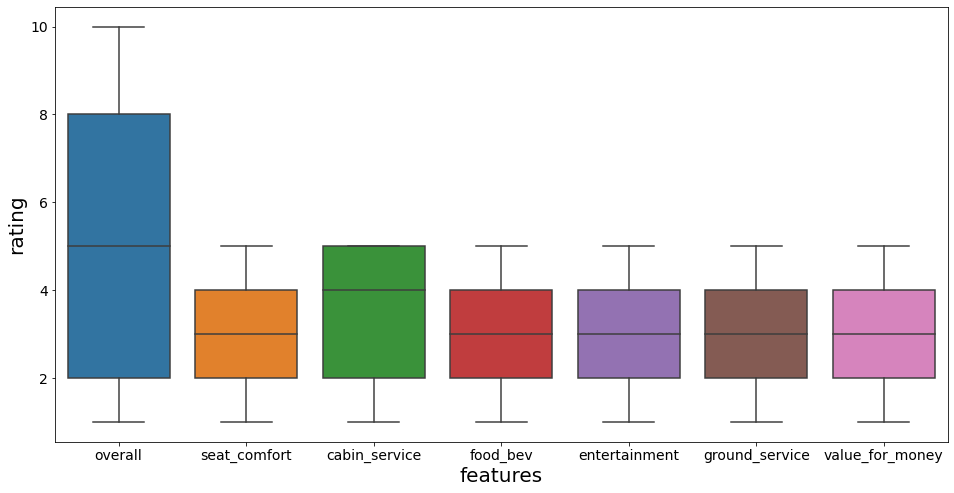

In [25]:
#boxplot
#figuresize
plt.figure(figsize =(16, 8))
#plotting boxplot 
sns.boxplot(data=df)
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('features', fontsize= 20)
plt.ylabel('rating', fontsize= 20)


* Outliers are not present in data.

* The median of 'Overall' is 5, The median of other features are approximately 

###Dependent Feature Pie Chart

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

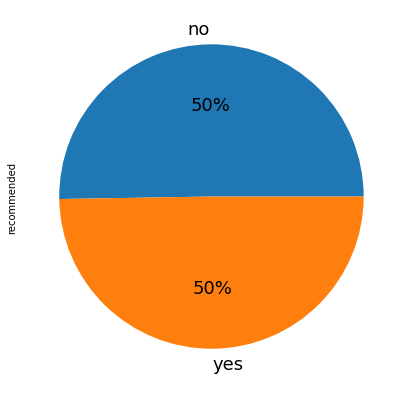

In [26]:
#plot of pie chart
df['recommended'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(7,7), textprops={'fontsize': 18})
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)


* recommended values of yes or no are 50-50%. 
* Dependent feature have balanced data.

###Travellers who recommended flight

Text(0, 0.5, 'count')

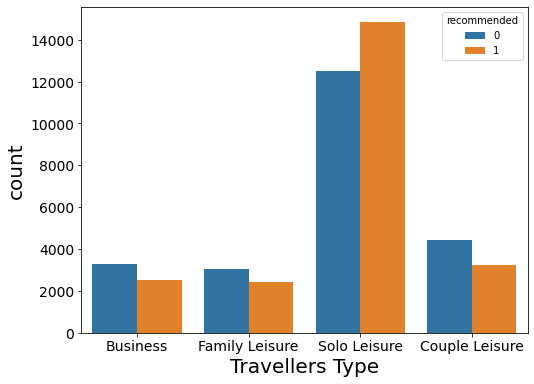

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(df['traveller_type'], hue=df['recommended'])
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Travellers Type', fontsize= 20)
plt.ylabel('count', fontsize= 20)

###Classes of the people who recommended

Text(0, 0.5, 'Count')

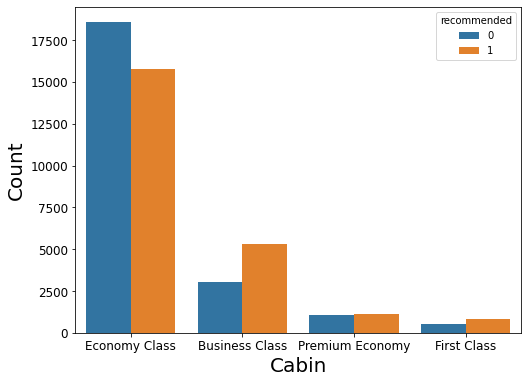

In [50]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(df['cabin'], hue=df['recommended'])
#Fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#Labels
plt.xlabel('Cabin', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

Text(0, 0.5, 'Count')

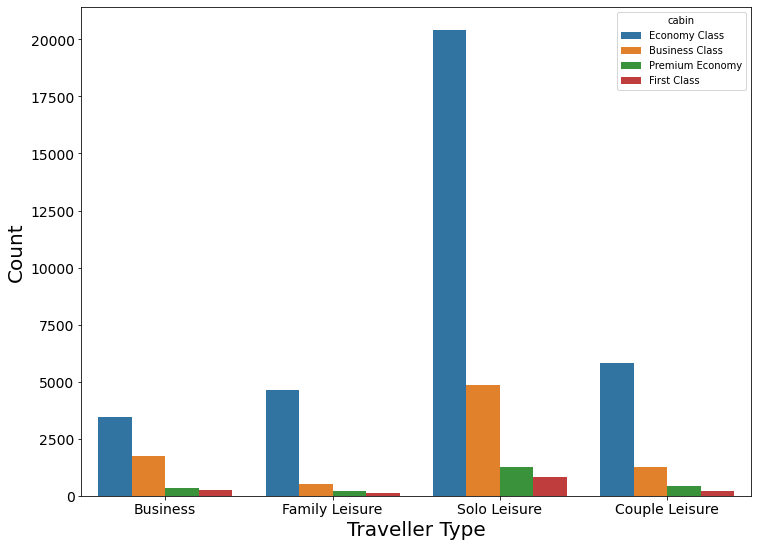

In [51]:
#plot of traveller_type and cabin 
sns.countplot(x='traveller_type', hue='cabin', data=df)
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Traveller Type', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

* All types of travellers mostly prefer economy class.
* After that comes business class which chose more after economy class.
* First class is least preferable among all travellers

###Overall rating of flights

Text(0, 0.5, 'Overall Rating')

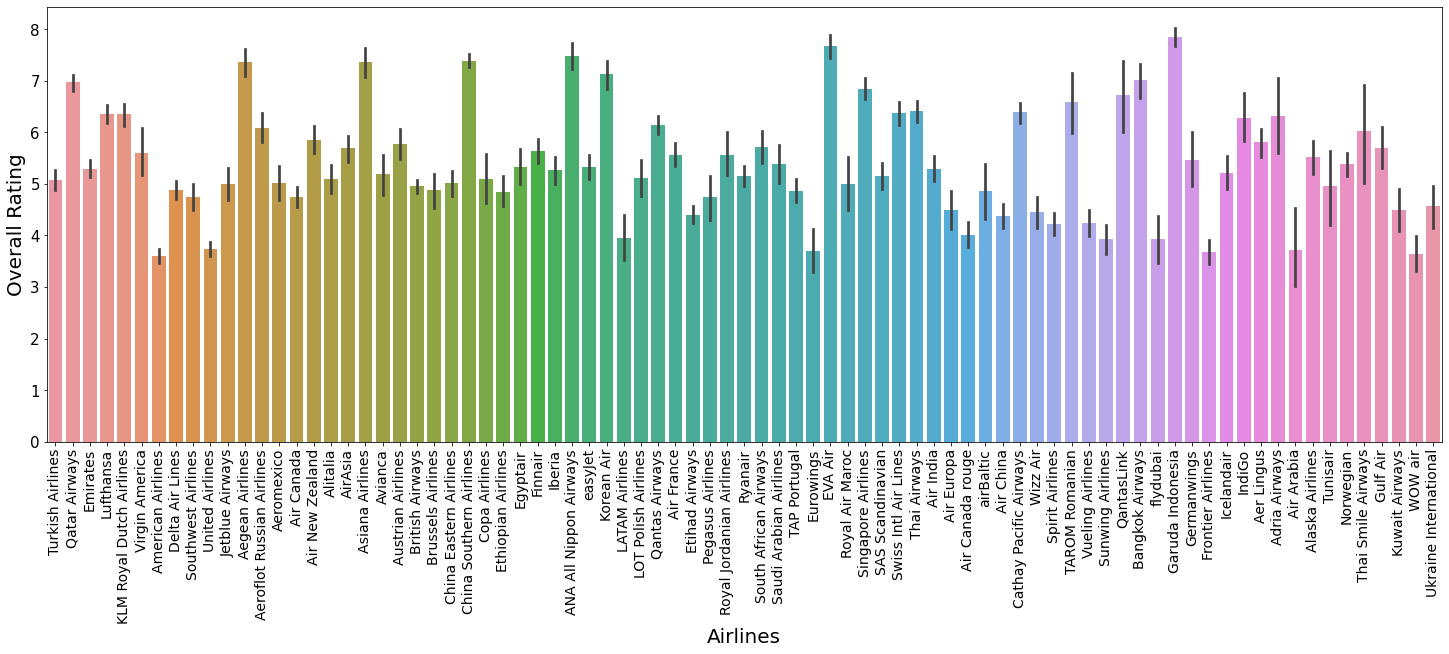

In [54]:
plt.figure(figsize=(25,8))
sns.barplot(x='airline', y='overall', data=df)
#Fontsize
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)

#Labels
plt.xlabel('Airlines', fontsize= 20)
plt.ylabel('Overall Rating', fontsize= 20)

###Airline and their recommendations

Text(0, 0.5, 'Count')

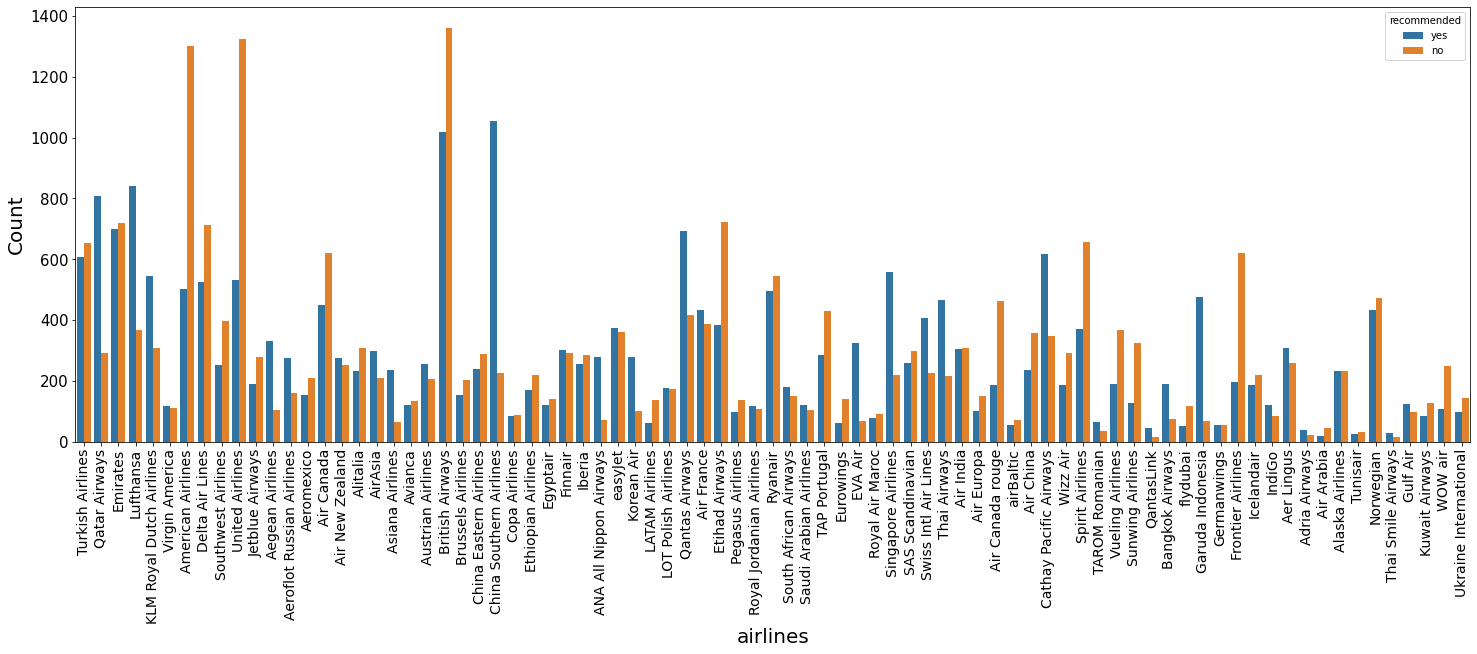

In [29]:
#figure size
plt.figure(figsize=(25,8))
#barplot
sns.countplot(x='airline', hue='recommended', data=df)
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labels
plt.xlabel('airlines', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

##Ratings and their recommendations

###Overall rating

Text(0, 0.5, 'Count')

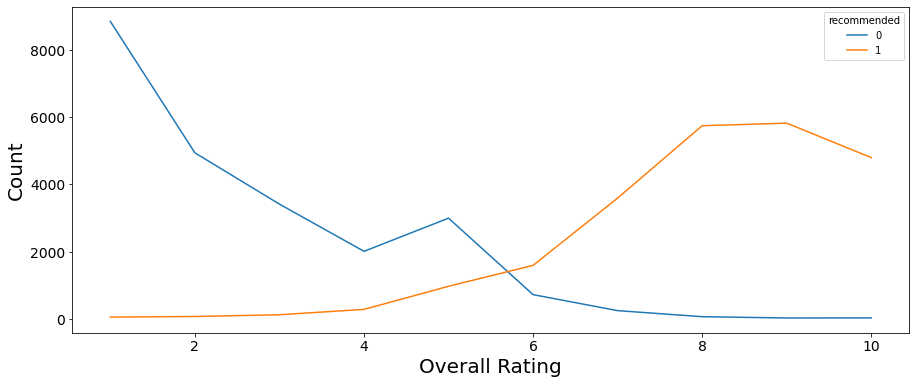

In [55]:
df.groupby(['overall'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Overall Rating', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

###Seat comfort

Text(0, 0.5, 'Count')

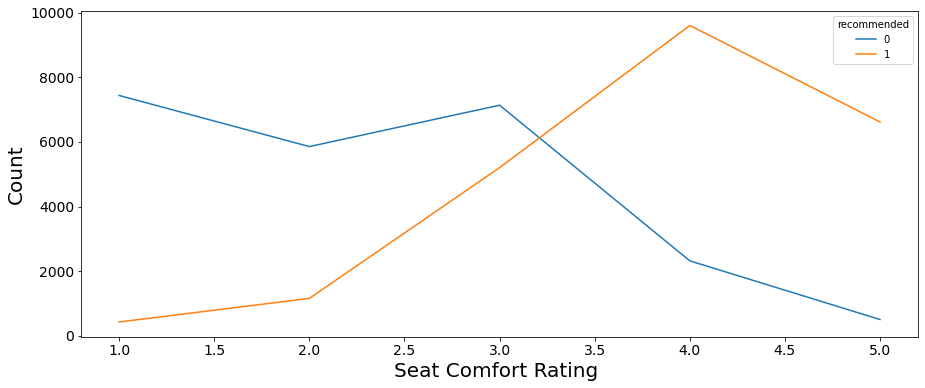

In [56]:
df.groupby(['seat_comfort'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Seat Comfort Rating ', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

###Cabin Service

Text(0, 0.5, 'Count')

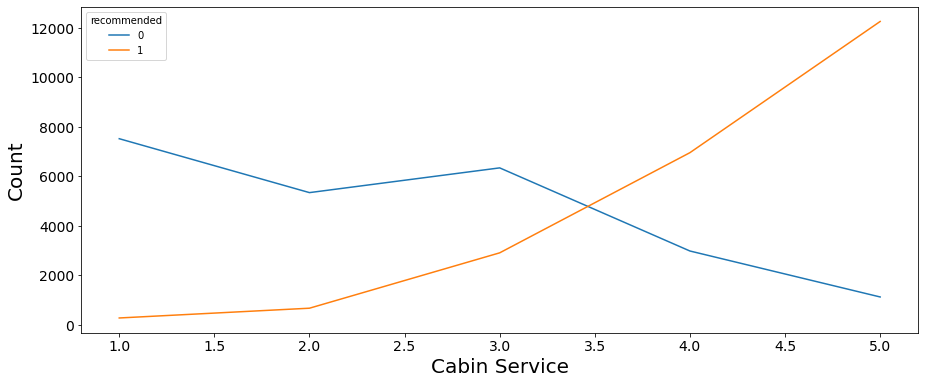

In [57]:
df.groupby(['cabin_service'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Cabin Service', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

###Food beverages

Text(0, 0.5, 'Count')

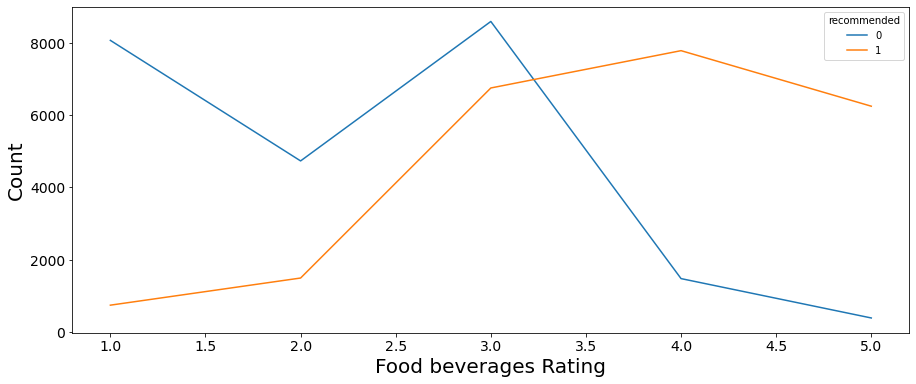

In [58]:
df.groupby(['food_bev'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Food beverages Rating', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

###Entertainment

Text(0, 0.5, 'Count')

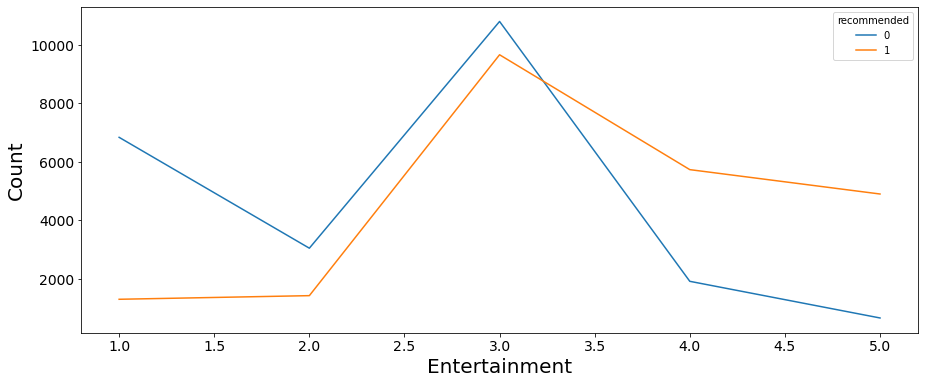

In [59]:
df.groupby(['entertainment'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Entertainment', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

###Ground Service

Text(0, 0.5, 'Count')

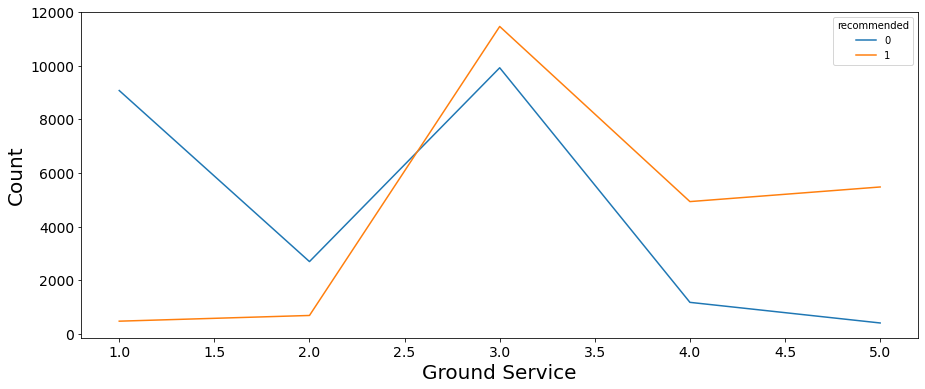

In [60]:
df.groupby(['ground_service'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Ground Service', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

###Value for money

Text(0, 0.5, 'Count')

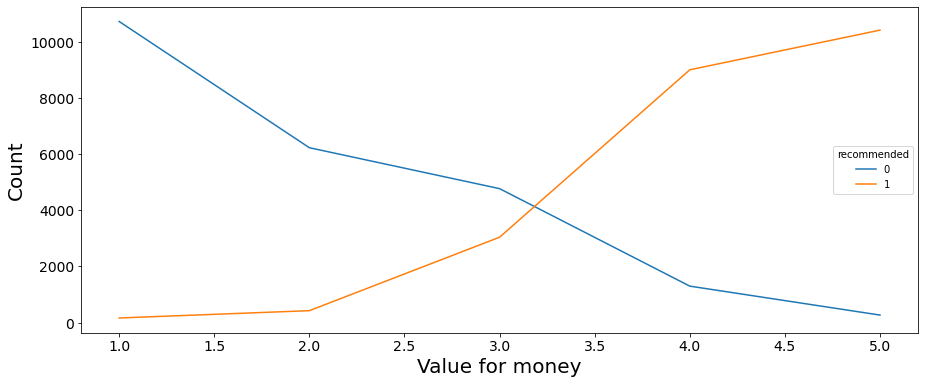

In [61]:
df.groupby(['value_for_money'])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('Value for money', fontsize= 20)
plt.ylabel('Count', fontsize= 20)

In [39]:
# replacing yes= 1 and no= 0 in recommended column
df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [40]:
numerical_features=df.drop(columns='airline')

##Checking the frequency of values

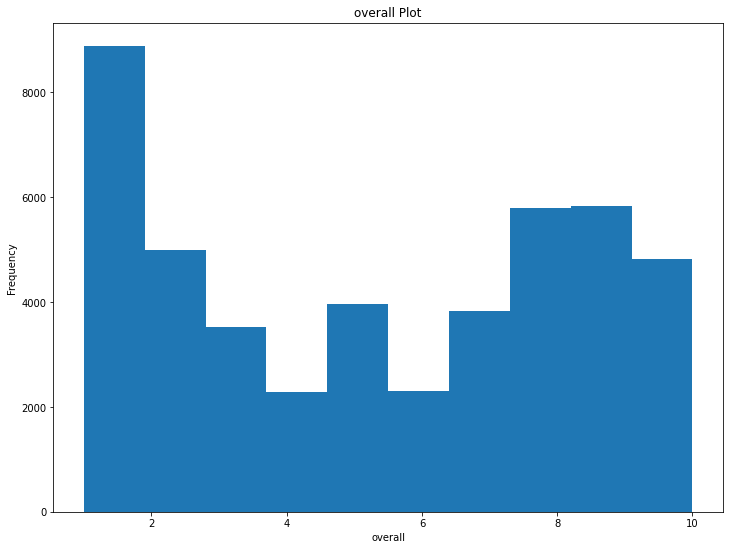

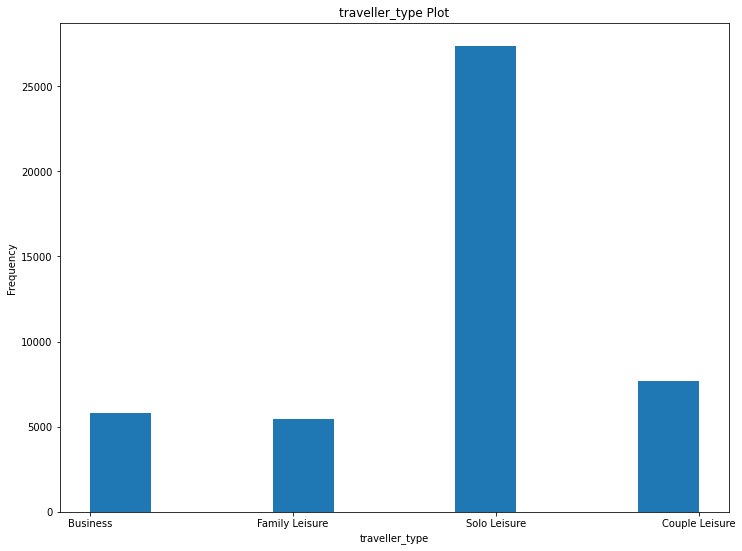

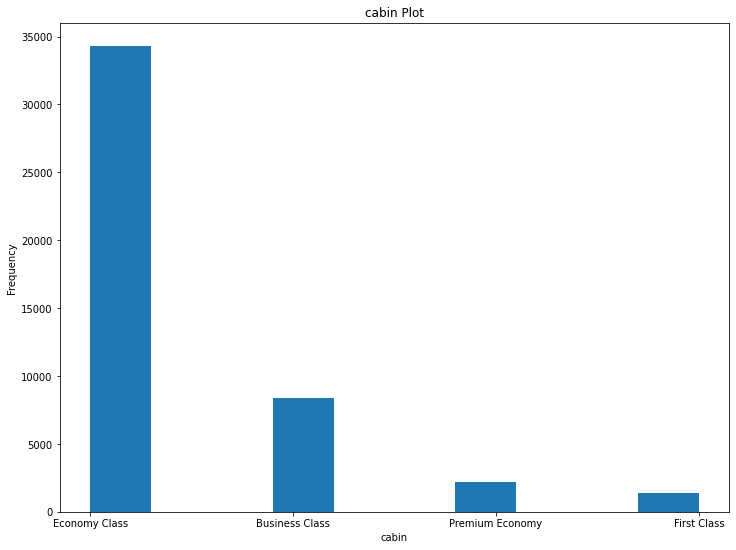

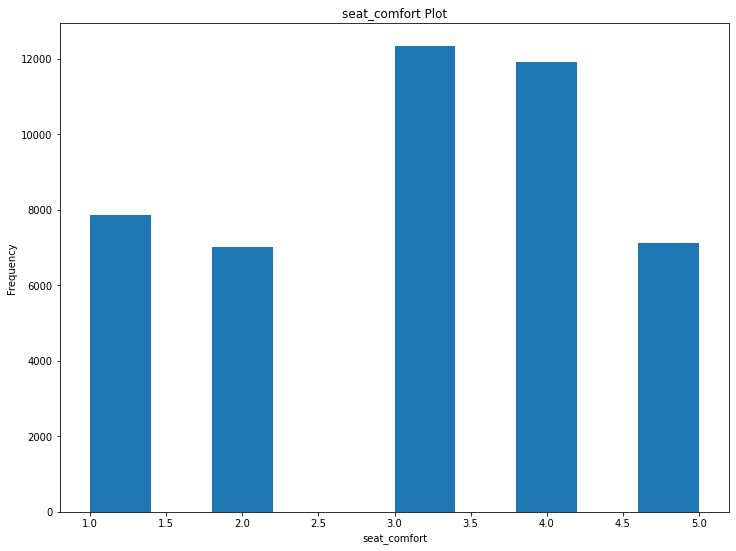

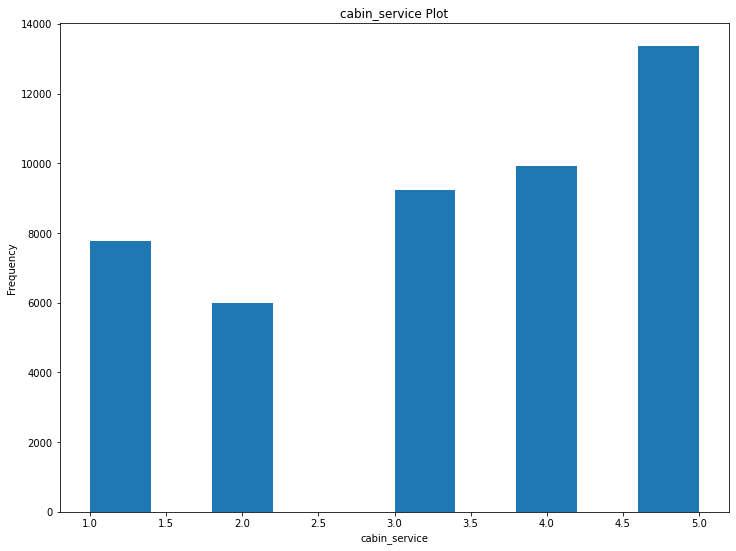

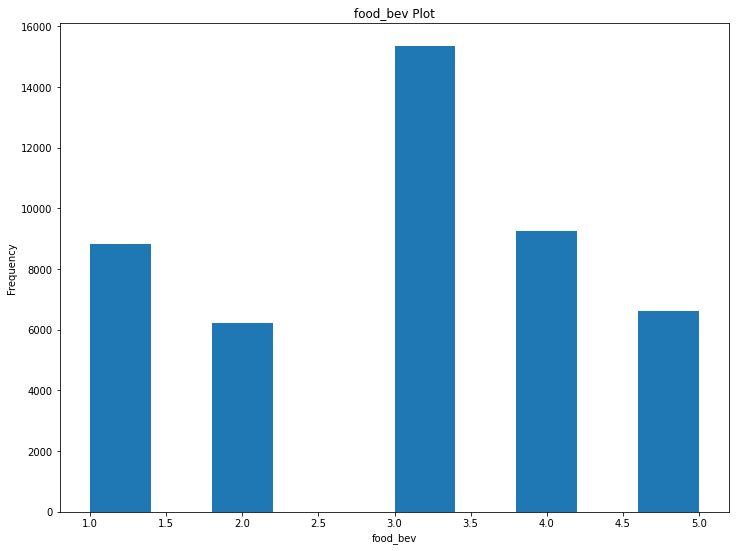

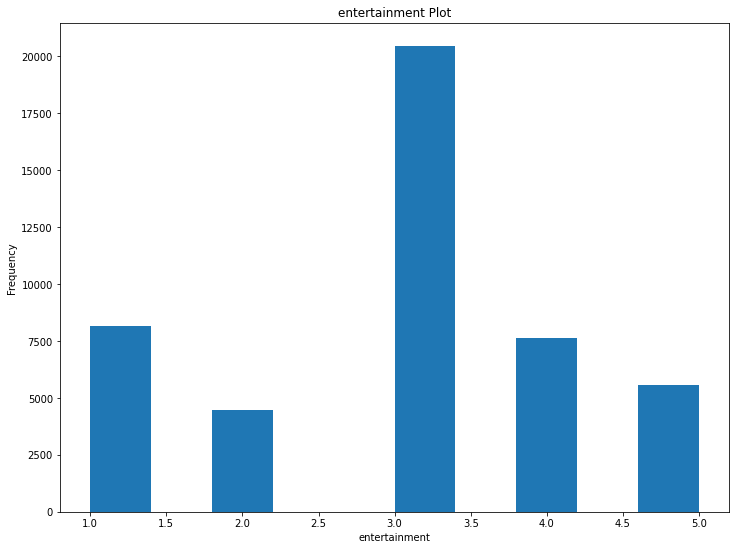

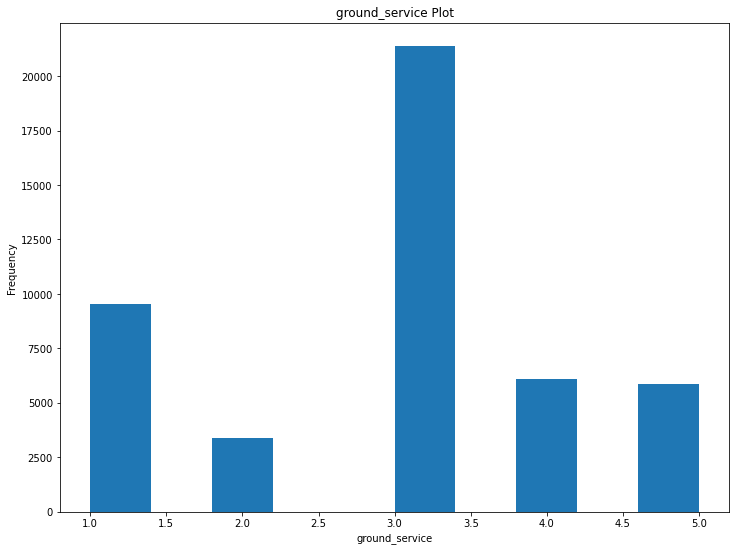

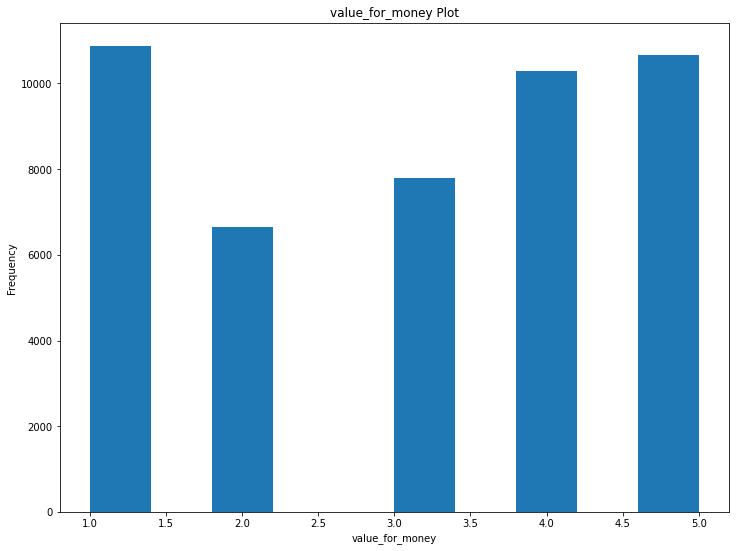

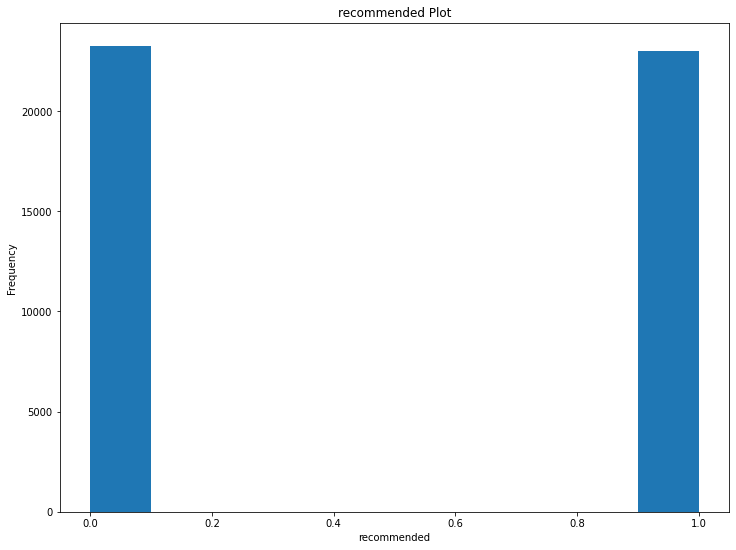

In [62]:
# plotting histogram for all numeric feature 
for i in numerical_features:
  #figure size
  plt.rcParams['figure.figsize']=(12,9)
  #histogram plot
  plt.hist(df[i], bins=10)
  #title of plot
  plt.title(i+" Plot")
  #label
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()

<u>From above plot</u>
1. In comparison to other ratings, the __overall feature ratings of 1 to 2 occur more frequently__. Passengers are dissatisfied with service facilities such as food beverage, seat comfort, cabin service, and so on... As a result, passengers offer the worst overall ratings.

2. In __traveller_type__ Solo leisure have more values which indicates that solo travellers are more in flight. 

3. In __cabin frequency of economy class is higher__ than others and __first class has lower frequency.__

4. From __Seat comfort feature__, __rating of 1 is highest__ and __rating of 4 is the second highest__.

5. The __food bev feature__ ratings of __2,4 and 5__ are varies equally.Which means their __frequency are approximately equal__.

6. From  __cabin service feature__, We can say that __rating of 5 is highest__ and __rating of 1 is the second highest__.

7. The features of __both the entertainment & ground service__, __ratings of 3 is highest__ and __ratings of 1 is the second highest__.

8. From __value for money feature__, It clearly shows that **most of the passenger gives ratings of 1 as highest**. From this we can say that most of the **airline does not provide good service** to passenger.

9. recommended has same frequency for 1 and 0

##Correlation plot

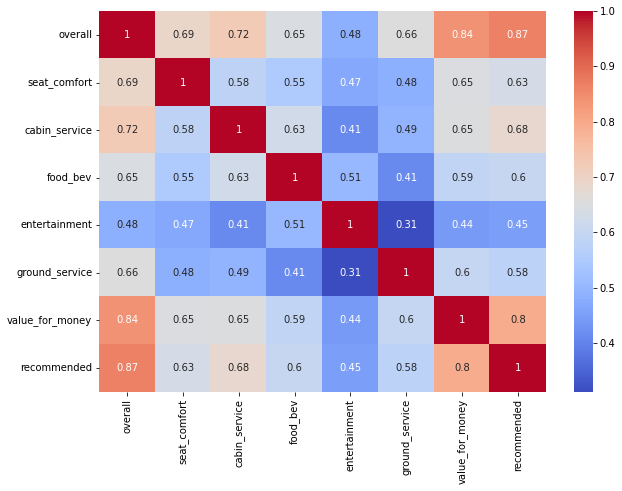

In [42]:

#setting the figure size and plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


1.  'Overall','food bev','cabin_service', 'value_for_money' etc are positively correlated with recommendation.

2.  'Overall' is most correlatetd with recommendation.

3. entertainment has 0.45 of correlation which is less than others

4.  overall and value for money have multicollinearity

### Removing Multicollinearity features

In [67]:
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [72]:
calc_vif(df[[i for i in df.describe().columns if i not in ['recommended']]])

,variables,VIF
0,overall,15.038088
1,seat_comfort,13.160478
2,cabin_service,13.982032
3,food_bev,12.610311
4,entertainment,9.129981
5,ground_service,9.651279
6,value_for_money,18.395545


In [73]:
calc_vif(df[[i for i in df.describe().columns if i not in ['recommended','overall','value_for_money']]])

,variables,VIF
0,seat_comfort,11.950312
1,cabin_service,12.591284
2,food_bev,12.231827
3,entertainment,9.024823
4,ground_service,8.530333


__Overall column__ and __Value_for_money__ got removed due to __multicollinearity__  between them.

In [75]:
#Dropping Multicollinearity features
df.drop(['value_for_money','overall'],axis=1,inplace=True)
df.head(20)

KeyError: ignored

#Encoding Techniques for Categorical Data

In [77]:
# categoriacal features to do one hot encoding
categorical_columns =['airline','cabin','traveller_type']
categorical_columns

['airline', 'cabin', 'traveller_type']

In [94]:
df2= pd.get_dummies(df,columns=categorical_columns , drop_first = False)

In [95]:
df2.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,airline_ANA All Nippon Airways,airline_Adria Airways,airline_Aegean Airlines,airline_Aer Lingus,...,airline_easyJet,airline_flydubai,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure
0,4.0,5.0,4.0,4.0,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,4.0,1.0,1.0,1.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1.0,4.0,1.0,3.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4.0,5.0,5.0,5.0,5.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [98]:
df2.columns

Index(['seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'recommended', 'airline_ANA All Nippon Airways',
       'airline_Adria Airways', 'airline_Aegean Airlines',
       'airline_Aer Lingus', 'airline_Aeroflot Russian Airlines',
       'airline_Aeromexico', 'airline_Air Arabia', 'airline_Air Canada',
       'airline_Air Canada rouge', 'airline_Air China', 'airline_Air Europa',
       'airline_Air France', 'airline_Air India', 'airline_Air New Zealand',
       'airline_AirAsia', 'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air Lines', 'airline_EVA Air',
       'airline_Egyptair', '

#**Splitting the Data to Train and Test**

In [103]:
#getting the independent variables
x = df2.drop('recommended', axis =1)

#getting the dependent variables
y= df2['recommended']

In [107]:
# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

###Training set = 80% 

###Test set = 20%

In [108]:
# Get shapes for Train and Test set
X_train.shape,X_test.shape

((37024, 94), (9257, 94))